# Module 1 Practice: Anscombe's Quartet

In this practice, we will recreate the Anscombe's Quartet visualization using `ggplot2` functionality.

We will use the **`ggplot2`** library which has many useful functions to create nice plots and graphics. We will also use some other libraries to help with the layout.

In [ ]:
# install.packages("gridExtra", repos="https://cloud.r-project.org")

In [4]:
library(tidyverse)       # Useful R comprehensive library that includes ggplot2
library(gridExtra)       # Allowing to create multiple plots at once

── Attaching core tidyverse packages ────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ──────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
# Call the data
data(anscombe)
head(anscombe)

,x1,x2,x3,x4,y1,y2,y3,y4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04


In [3]:
# Descriptive statistics summary
summary(anscombe)

       x1             x2             x3             x4           y1        
 Min.   : 4.0   Min.   : 4.0   Min.   : 4.0   Min.   : 8   Min.   : 4.260  
 1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 8   1st Qu.: 6.315  
 Median : 9.0   Median : 9.0   Median : 9.0   Median : 8   Median : 7.580  
 Mean   : 9.0   Mean   : 9.0   Mean   : 9.0   Mean   : 9   Mean   : 7.501  
 3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.: 8   3rd Qu.: 8.570  
 Max.   :14.0   Max.   :14.0   Max.   :14.0   Max.   :19   Max.   :10.840  
       y2              y3              y4        
 Min.   :3.100   Min.   : 5.39   Min.   : 5.250  
 1st Qu.:6.695   1st Qu.: 6.25   1st Qu.: 6.170  
 Median :8.140   Median : 7.11   Median : 7.040  
 Mean   :7.501   Mean   : 7.50   Mean   : 7.501  
 3rd Qu.:8.950   3rd Qu.: 7.98   3rd Qu.: 8.190  
 Max.   :9.260   Max.   :12.74   Max.   :12.500  

In [4]:
# Let's compute the correlation
data.frame(
    data=c(1, 2, 3, 4),
    correlation=sapply(1:4, function(x) cor(anscombe[, x], anscombe[, x+4]))
)

data,correlation
<dbl>,<dbl>
1,0.8164205
2,0.8162365
3,0.8162867
4,0.8165214


In [5]:
data.frame(
    data=c(1:4),
    intercepts=sapply(1:4, function(i) {
    yvar <- anscombe[[paste('y', i, sep="")]]
    xvar <- anscombe[[paste('x', i, sep="")]]
    return (lm(yvar ~ xvar)$coefficients[1])
    }),
    coefficients=sapply(1:4, function(i) {
    yvar <- anscombe[[paste('y', i, sep="")]]
    xvar <- anscombe[[paste('x', i, sep="")]]
    return (lm(yvar ~ xvar)$coefficients[2])
    })
)

data,intercepts,coefficients
<int>,<dbl>,<dbl>
1,3.000091,0.5000909
2,3.000909,0.5000000
3,3.002455,0.4997273
4,3.001727,0.4999091


In [6]:
options(repr.plot.width=15, repr.plot.height=15)

In [7]:
test <- lapply(1:4,
       function(i) {
           pp <- (
               ggplot()
               + geom_point(color='darkorange', size=3)
               + aes(x=anscombe[[paste('x', i, sep="")]], y=anscombe[[paste('y', i, sep="")]])
               + theme_classic()
               + theme(
                   plot.title = element_text(size=16, face='bold'),
                   axis.title = element_text(size=14),
                   axis.text = element_text(size=14)
               )
               # Adjust the limits on the axes
               + scale_x_continuous(breaks=seq(0, 18, 2))
               + scale_y_continuous(breaks=seq(0, 12, 2))
               + geom_abline(intercept=3, slope=0.5, color='cornflowerblue')
               + expand_limits(x=c(4, 18), y= c(4,12))
               + labs(title=paste("dataset", i),
                      x=paste("x", i, sep=""),
                      y=paste("y", i, sep=""))
               )
           return(pp)
        })

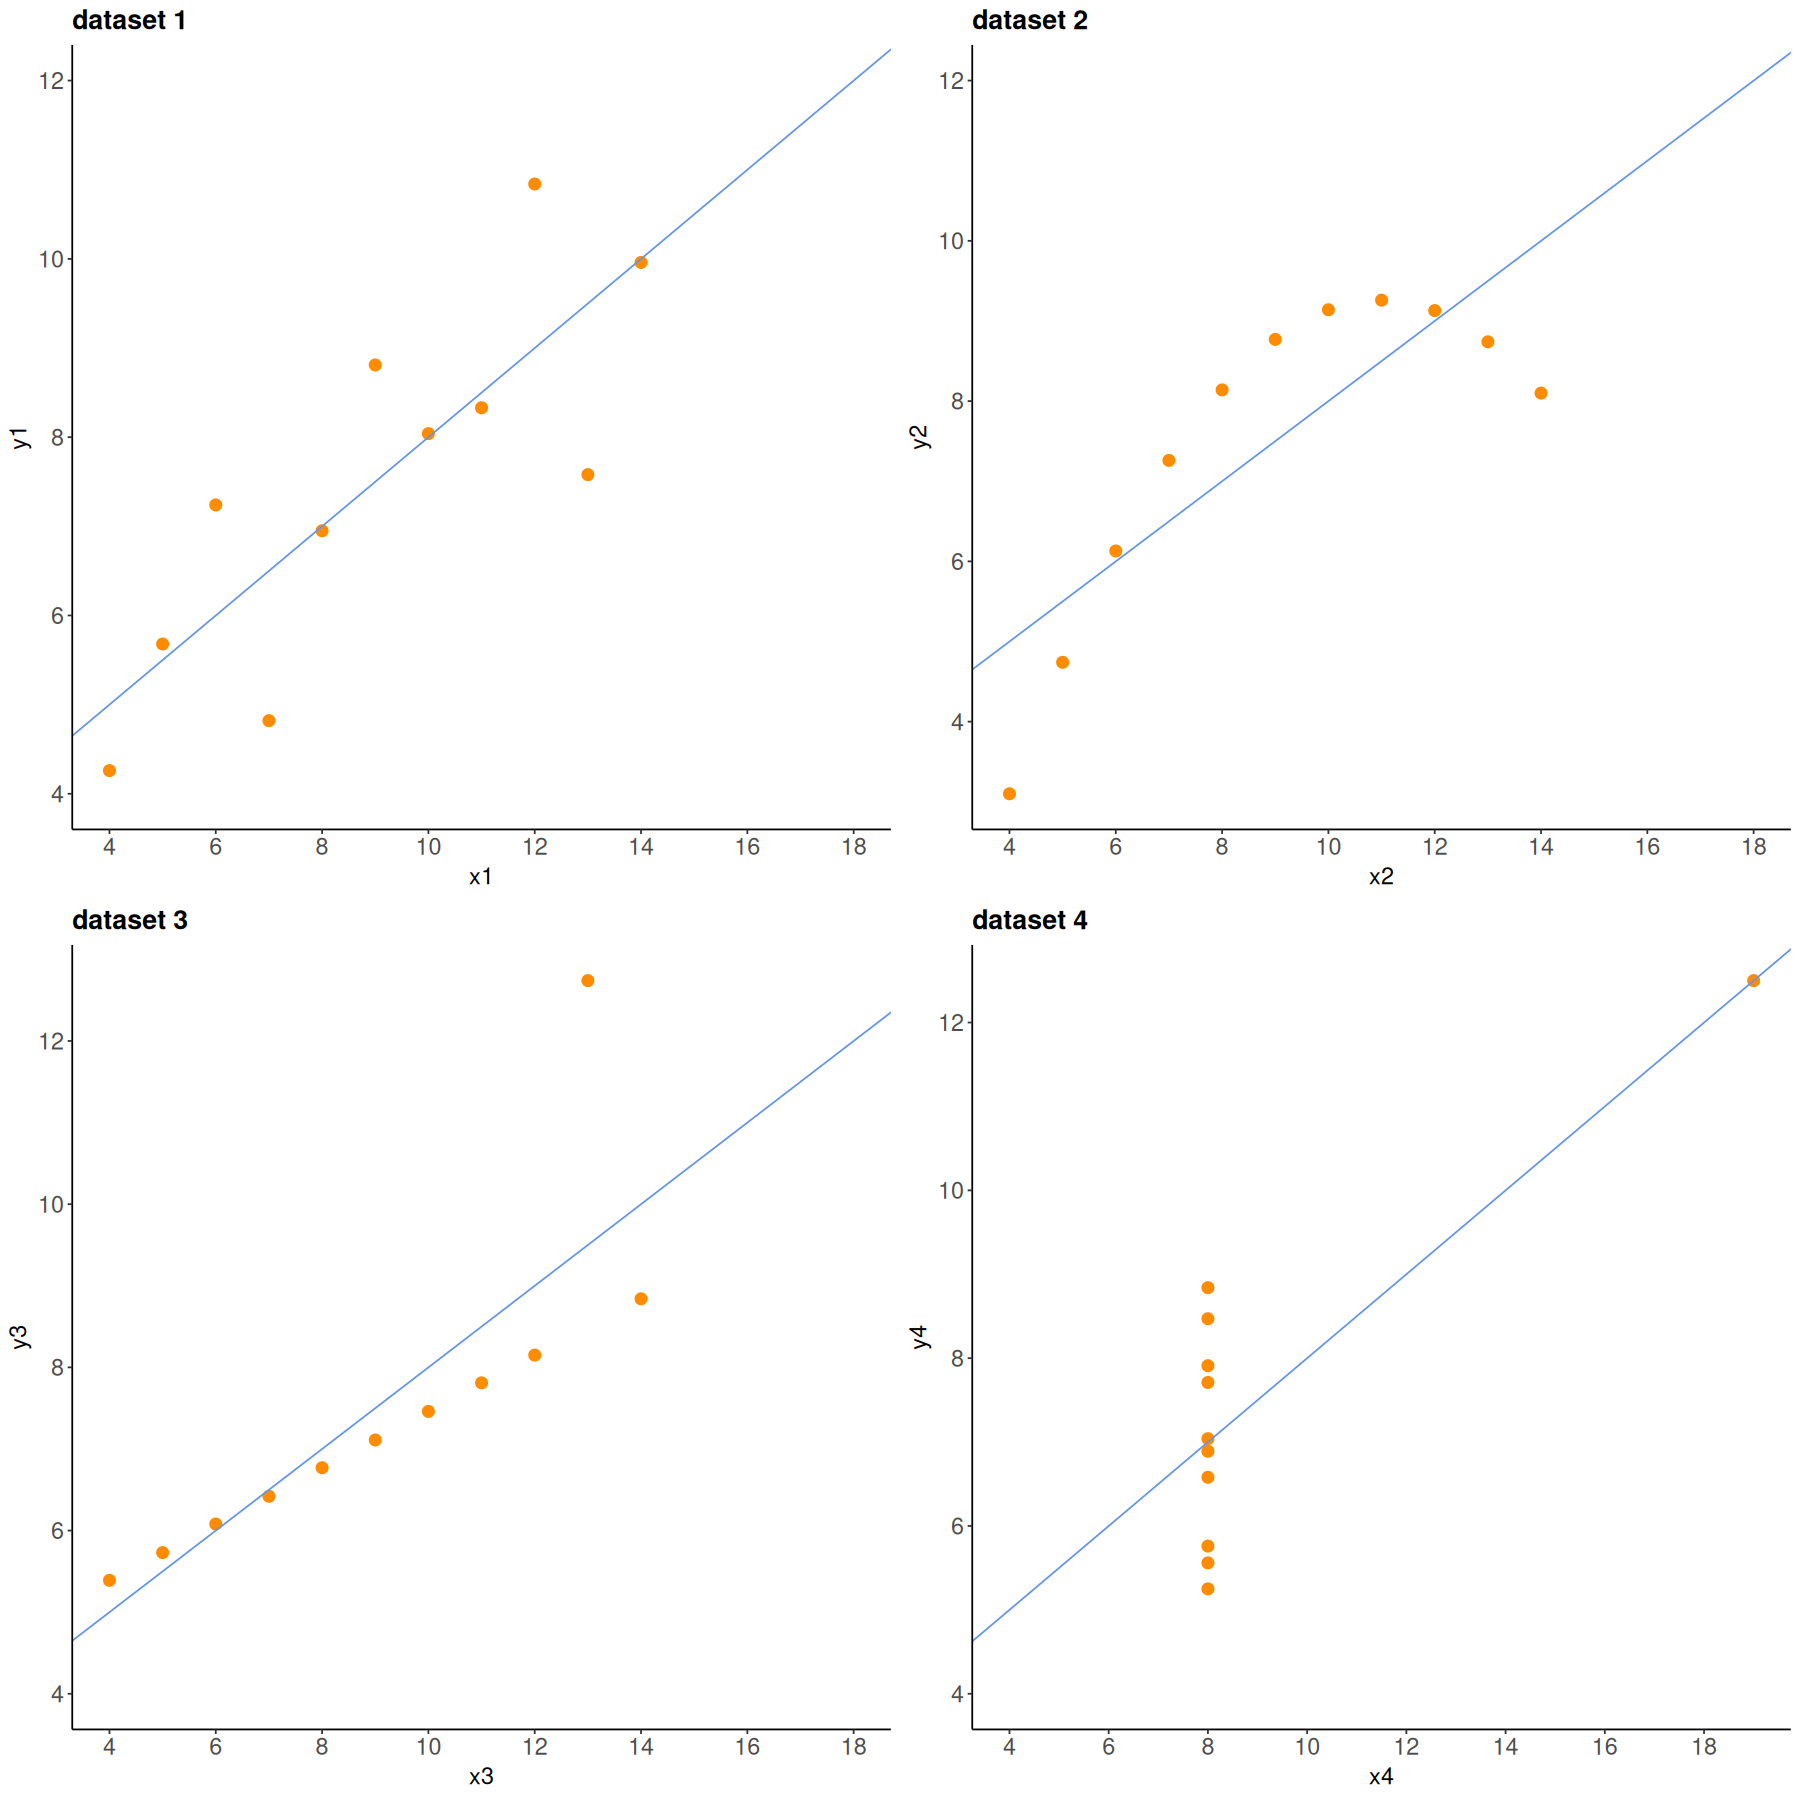

In [8]:
grid.arrange(test[[1]], test[[2]], test[[3]], test[[4]])